<a href="https://colab.research.google.com/github/Laxmi-Narayana-Chilakala/Stock-price-Prediction/blob/main/Stock_price_model_predictions_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MSFT STOCK PRICES PREDICTION**

*What is the Stock Market? The stock market refers to the collection of markets and exchanges where regular activities of buying, selling, and issuance of shares of publicly-held companies take place. Such financial activities are conducted through institutionalized formal exchanges or over-the-counter (OTC) marketplaces which operate under a defined set of regulations. There can be multiple stock trading venues in a country or a region which allow transactions in stocks and other forms of securities.*

In [ ]:
#Importing Required libraries for model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading data into notebook

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [ ]:
#Reading data into a dataframe

In [ ]:
df=pd.read_csv('/content/MSFT.csv')

In [ ]:
#Checking first 5 rows from dataframe 

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [ ]:
#Checking shape of the dataframe

In [ ]:
df.shape

(8857, 7)

In [ ]:
#Checking last five rows of dataframe

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,WeekDay
Date,,,,,,,,,,
2021-04-27,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200,2021,4,1
2021-04-28,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100,2021,4,2
2021-04-29,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000,2021,4,3
2021-04-30,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200,2021,4,4
2021-05-03,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900,2021,5,0


In [ ]:
#dataframe info for descriptive analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [ ]:
#Checking description of data, how data varies 

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [ ]:
#Converting date feature into datetime format

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
8852   2021-04-27
8853   2021-04-28
8854   2021-04-29
8855   2021-04-30
8856   2021-05-03
Name: Date, Length: 8857, dtype: datetime64[ns]

In [ ]:
#Stock prices starts from
df.Date.min()

Timestamp('1986-03-13 00:00:00')

In [ ]:
#Stock prices ends at
df.Date.max()

Timestamp('2021-05-03 00:00:00')

In [ ]:
#Total Number of days
(df.Date.max()-df.Date.min()).days

12835

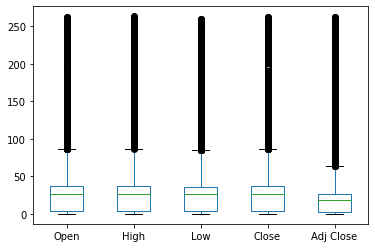

In [ ]:
df[df.columns[:-1]].plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1617325190>,
      dtype=object)

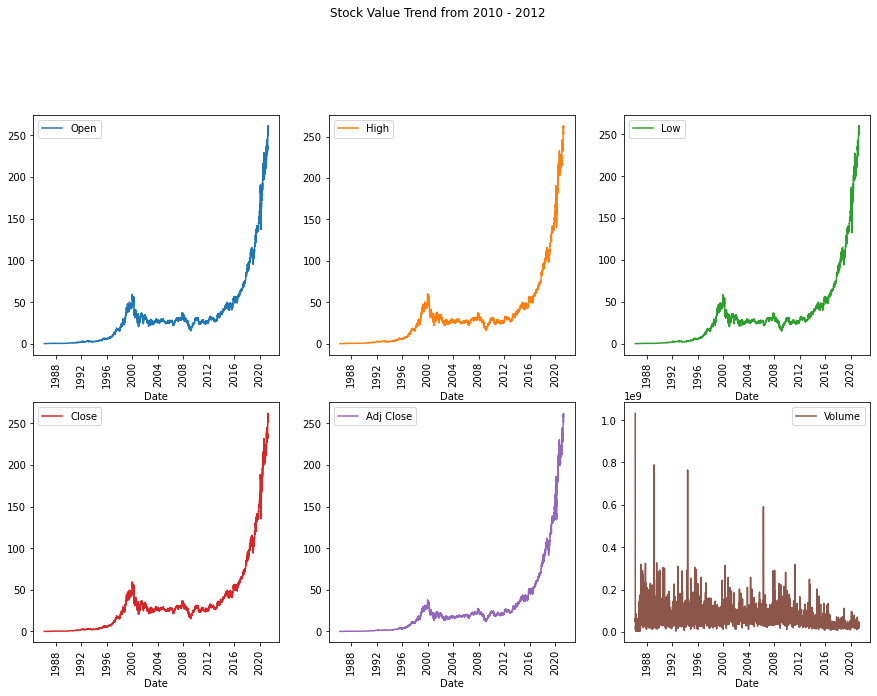

In [ ]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
df.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2010 - 2012", rot = 90)

 From above graph we are Plotting the graph on each column  on Y-axis with respect to date on X-axis

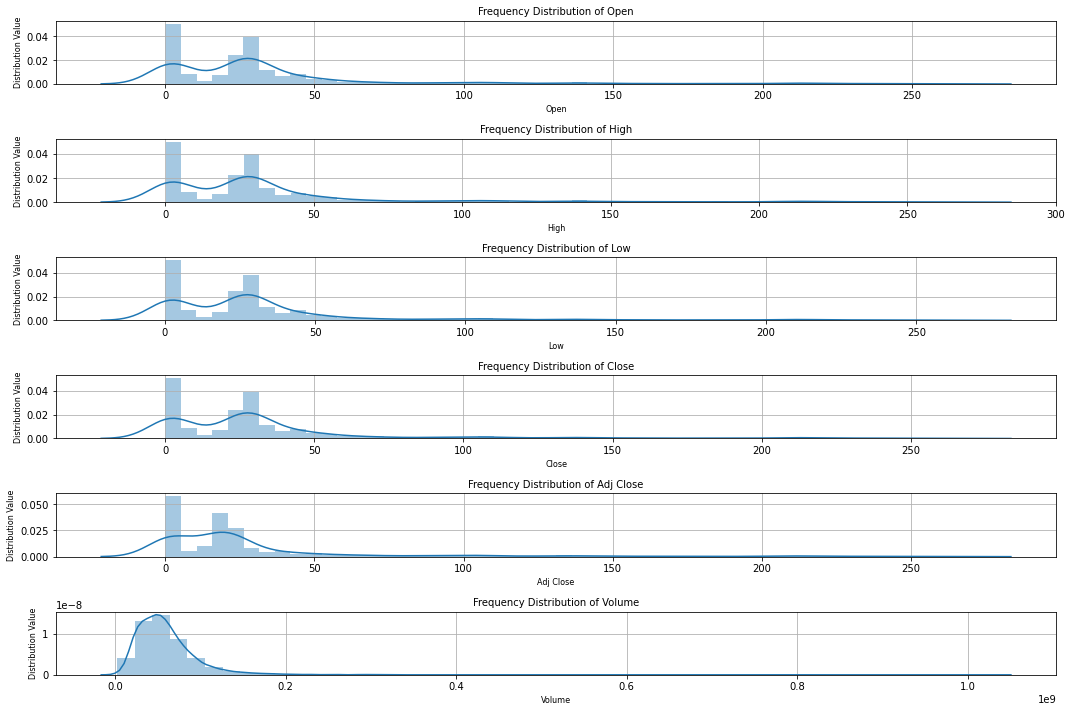

In [ ]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(df[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

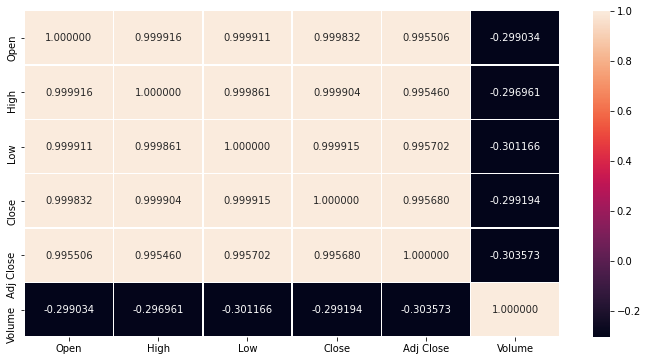

In [ ]:
#correlation
import seaborn as sns
plt.figure(figsize=(12,6))
autoDataColumns = ['Open','High','Low','Close','Adj Close','Volume']
sns.heatmap(df[autoDataColumns].corr(), annot=True, fmt='.6f', linewidths=.5)

# correlation

In [ ]:
# View the matrix in a table to identify the numerical values of strengths
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999916,0.999911,0.999832,0.995506,-0.299034
High,0.999916,1.000000,0.999861,0.999904,0.995460,-0.296961
Low,0.999911,0.999861,1.000000,0.999915,0.995702,-0.301166
Close,0.999832,0.999904,0.999915,1.000000,0.995680,-0.299194
Adj Close,0.995506,0.995460,0.995702,0.995680,1.000000,-0.303573
Volume,-0.299034,-0.296961,-0.301166,-0.299194,-0.303573,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc0a1cef50>,
      dtype=object)

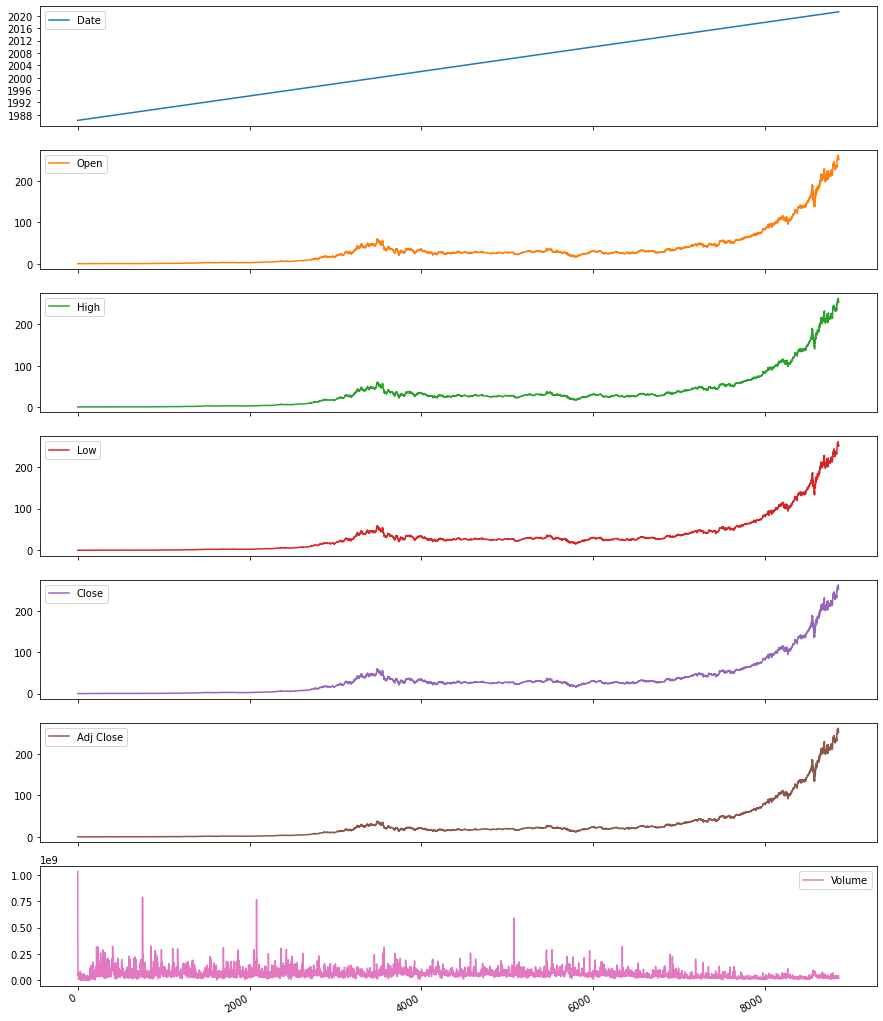

In [ ]:
df.plot(subplots=True, figsize=(15, 20))

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

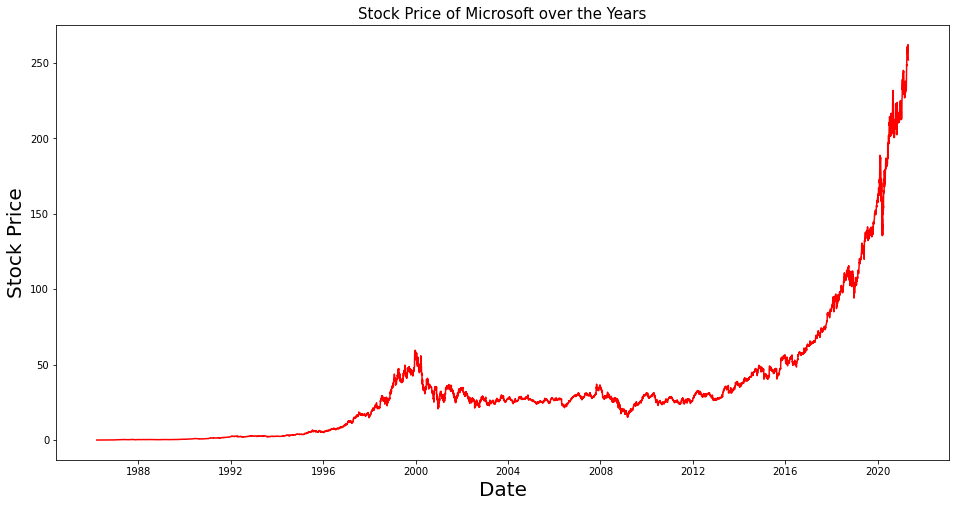

In [ ]:
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price History',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Microsoft over the Years',size=15)

Outlier Detection and Removal Extensive Analysis on Historical Data to Find Patterns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
/usr/local/lib/python3.7/dist-packages/ipykernel_l

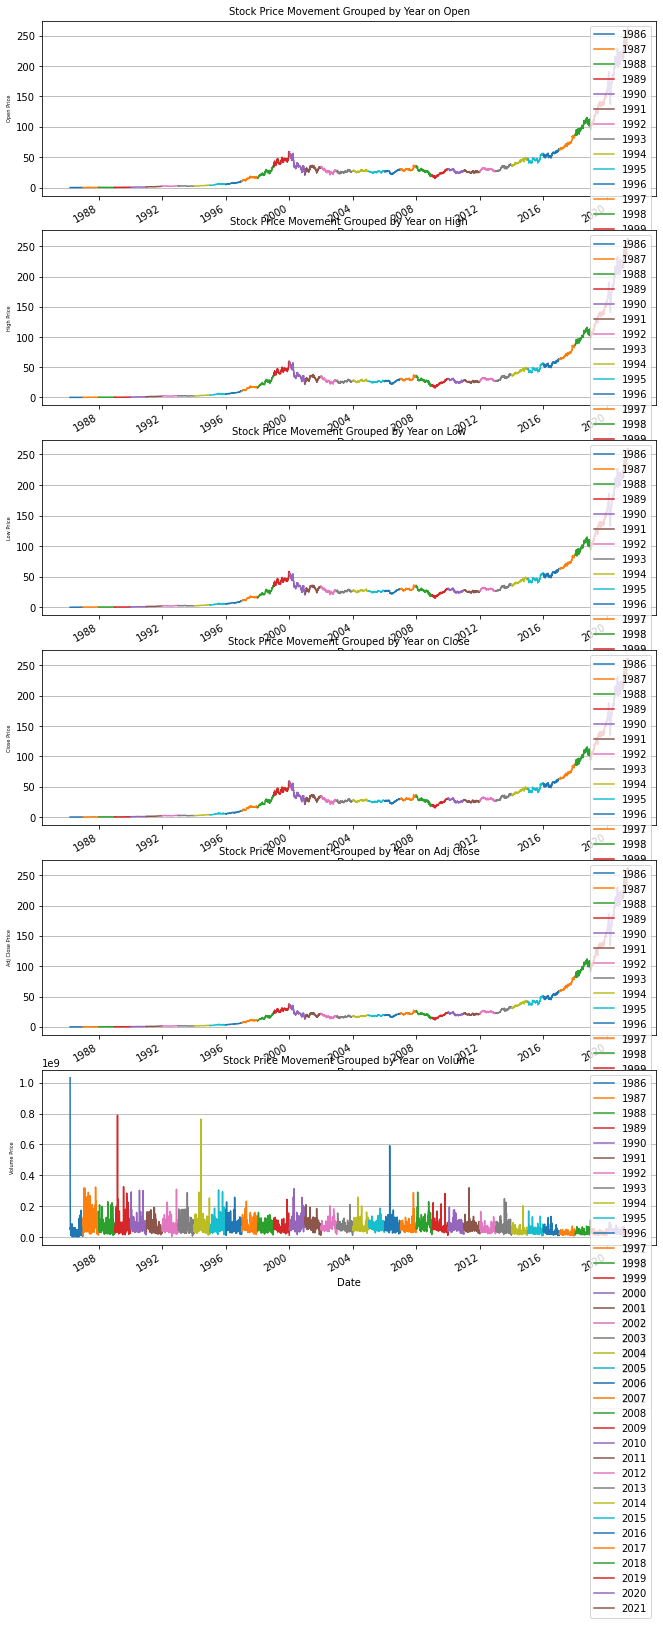

In [ ]:
# Since the data is a time series data, we should be able to predict the future through forecasting techniques

# Delete the index column due to reset
#del Data['index']

# Decompose the time series year-wise and month-wise to analyse further
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekDay'] = df['Date'].dt.weekday

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (11, 25))

# Group the data by year and plot
for i, col_list in enumerate(Column_List):
    df.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 5)
    fig.tight_layout(pad = 1.5)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

Pie charts to show the extensive influence of time in the overall volume trade

Analysis:

Year Information: 1986 - 2020

Month Information: All 12 months (January, February, March, April, May, June, July, August, September, October, November, and December)

Day Information: Only 5 working days (Monday, Tuesday, Wednesday, Thursday and Friday)

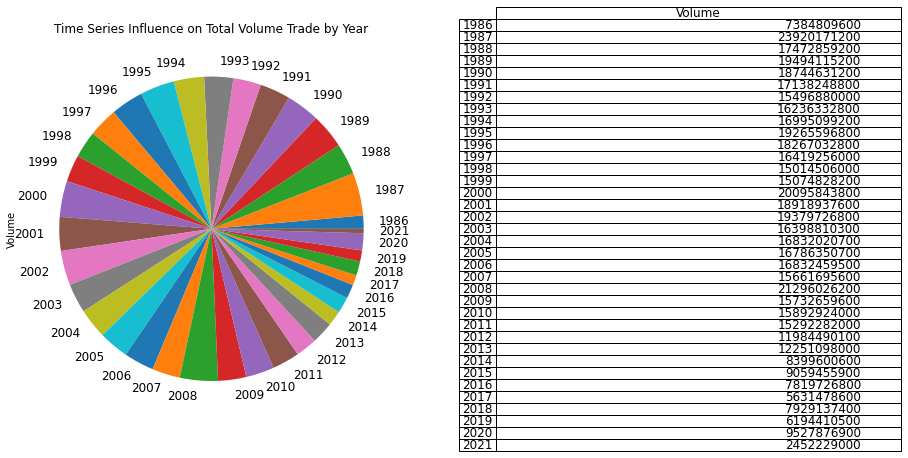

In [ ]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = df.groupby('Year')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

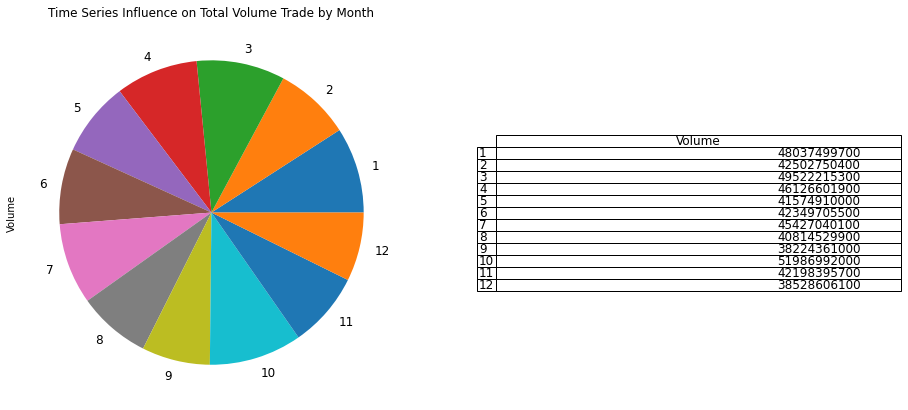

In [ ]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = df.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

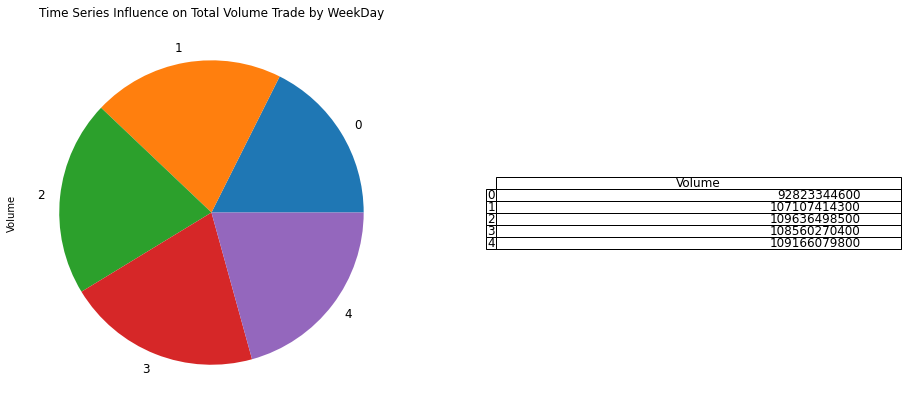

In [ ]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = df.groupby('WeekDay')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

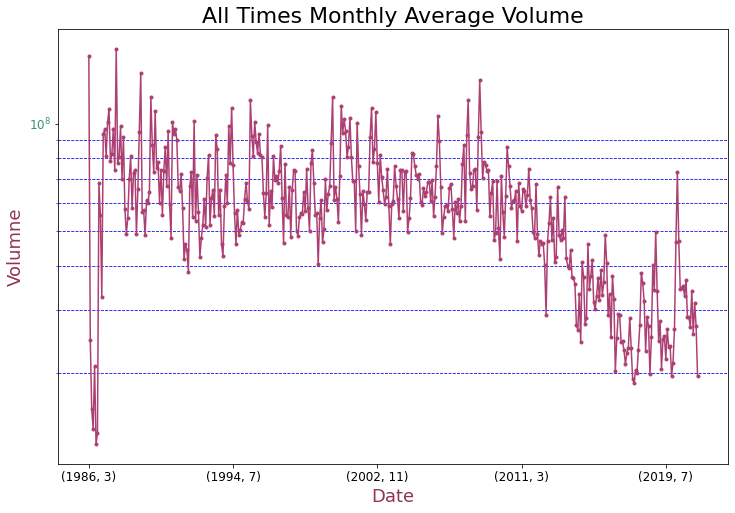

In [ ]:
#All times monthly average Volume
plt.figure(figsize=(12,8))
df.groupby([df.Date.dt.year,df.Date.dt.month])["Volume"].mean().plot(color="#ad4073",marker=".")
plt.xlabel("Date",color="#913653", size=18)
plt.ylabel("Volumne",color="#913653", size=18)
plt.title("All Times Monthly Average Volume",size=22)

plt.yscale("log")
plt.grid(color="blue", linestyle="--", which="minor")
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12, color="#3d8f6e") 
plt.show()

In [ ]:
df1=df.reset_index()['Close']

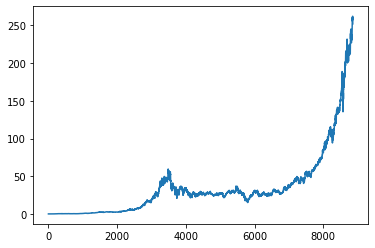

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[2.65159923e-05]
 [3.97739884e-05]
 [4.64067989e-05]
 ...
 [9.63876521e-01]
 [9.62616393e-01]
 [9.61394489e-01]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5757, 3100)

In [ ]:
train_data[:10]

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       [3.64594894e-05],
       [2.98304913e-05],
       [1.98869942e-05],
       [9.94349711e-06],
       [0.00000000e+00],
       [6.62899807e-06],
       [1.65724952e-05]])

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5656, 100)
(5656,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(2999, 100)
(2999,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM

Long Short Term Memory (LSTM)
Introduction
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:
The input gate: The input gate adds information to the cell state The forget gate: It removes the information that is no longer required by the model The output gate: Output Gate at LSTM selects the information to be shown as output

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
89/89 [==============================] - 12s 29ms/step - loss: 3.6507e-04 - val_loss: 0.0020
Epoch 2/100
89/89 [==============================] - 1s 16ms/step - loss: 3.0890e-05 - val_loss: 0.0024
Epoch 3/100
89/89 [==============================] - 1s 16ms/step - loss: 2.8643e-05 - val_loss: 0.0026
Epoch 4/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7984e-05 - val_loss: 0.0030
Epoch 5/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7443e-05 - val_loss: 0.0025
Epoch 6/100
89/89 [==============================] - 1s 16ms/step - loss: 2.7424e-05 - val_loss: 0.0025
Epoch 7/100
89/89 [==============================] - 1s 16ms/step - loss: 2.1382e-05 - val_loss: 0.0031
Epoch 8/100
89/89 [==============================] - 1s 16ms/step - loss: 2.0880e-05 - val_loss: 0.0030
Epoch 9/100
89/89 [==============================] - 1s 16ms/step - loss: 1.8562e-05 - val_loss: 0.0030
Epoch 10/100
89/89 [==============================] - 1s 16ms/s

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

21.262399464443305

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

84.1470832825665

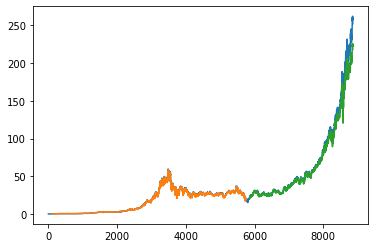

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()